In [0]:
import os
import librosa
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Reading the audio files

In [0]:
def load_audio_from_folder(folder):
    audios = []
    titles=[]
    print("Loaded--"+'\n')
    for filename in os.listdir(folder):
        path_to_load = "/content/drive/My Drive/total/total/" + filename
        print(path_to_load)
        y, sr = librosa.load(path_to_load, sr=16000)
        mfccs = np.mean(librosa.feature.mfcc(y, sr=16000, n_mfcc=40).T,axis=0) 
        audios.append(mfccs)
        titles.append(filename)
    return audios, titles

In [4]:
audio, titles= load_audio_from_folder("/content/drive/My Drive/total/total/")

Loaded--

/content/drive/My Drive/total/total/1.wav
/content/drive/My Drive/total/total/11.wav
/content/drive/My Drive/total/total/10.wav
/content/drive/My Drive/total/total/12.wav
/content/drive/My Drive/total/total/13.wav
/content/drive/My Drive/total/total/14.wav
/content/drive/My Drive/total/total/15.wav
/content/drive/My Drive/total/total/17.wav
/content/drive/My Drive/total/total/18.wav
/content/drive/My Drive/total/total/16.wav
/content/drive/My Drive/total/total/19.wav
/content/drive/My Drive/total/total/2.wav
/content/drive/My Drive/total/total/23.wav
/content/drive/My Drive/total/total/22.wav
/content/drive/My Drive/total/total/20.wav
/content/drive/My Drive/total/total/21.wav
/content/drive/My Drive/total/total/25.wav
/content/drive/My Drive/total/total/27.wav
/content/drive/My Drive/total/total/26.wav
/content/drive/My Drive/total/total/28.wav
/content/drive/My Drive/total/total/3.wav
/content/drive/My Drive/total/total/30.wav
/content/drive/My Drive/total/total/29.wav
/con

##Plotting any four files

In [0]:
y1, sr1 = librosa.load('/content/drive/My Drive/total/total/80.wav')
y2, sr2 = librosa.load('/content/drive/My Drive/total/total/50.wav')
y3, sr3 = librosa.load('/content/drive/My Drive/total/total/30.wav')
y4, sr4 = librosa.load('/content/drive/My Drive/total/total/10.wav')

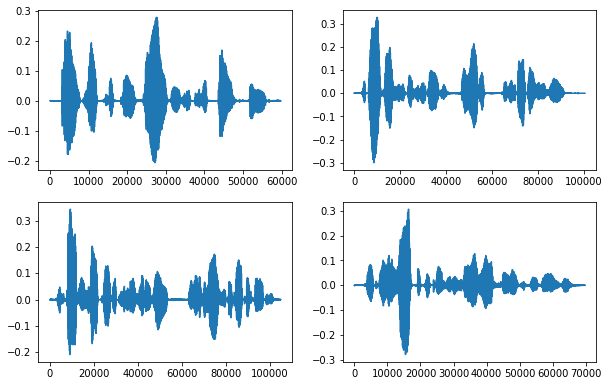

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.subplot(321)
plt.plot(y1)

plt.subplot(322)
plt.plot(y2)

plt.subplot(323)
plt.plot(y3)

plt.subplot(324)
plt.plot(y4)

plt.show()

##Plotting any four with sampling rate = 16000

In [0]:
y1, sr1 = librosa.load('/content/drive/My Drive/total/total/80.wav', sr = 16000)
y2, sr2 = librosa.load('/content/drive/My Drive/total/total/50.wav', sr = 16000)
y3, sr3 = librosa.load('/content/drive/My Drive/total/total/30.wav', sr = 16000)
y4, sr4 = librosa.load('/content/drive/My Drive/total/total/10.wav', sr = 16000)

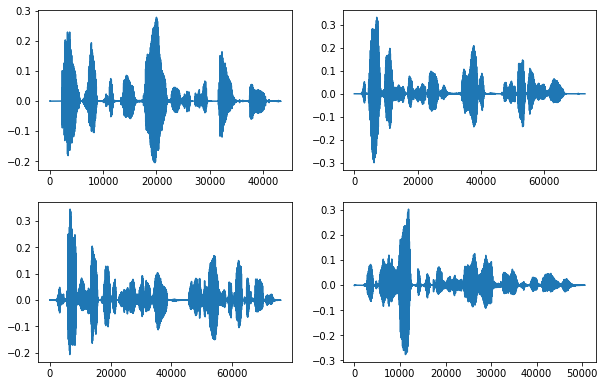

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.subplot(321)
plt.plot(y1)

plt.subplot(322)
plt.plot(y2)

plt.subplot(323)
plt.plot(y3)

plt.subplot(324)
plt.plot(y4)

plt.show()

##Clustering using GMM

###Number of clusters = 2

In [9]:
cluster = GaussianMixture(n_components=2)

cluster.fit(audio)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
cluster_assign = cluster.predict(audio)

In [12]:
for i in range(0, len(cluster_assign)):
  print(titles[i],"has a label::", cluster_assign[i])

1.wav has a label:: 1
11.wav has a label:: 1
10.wav has a label:: 1
12.wav has a label:: 0
13.wav has a label:: 1
14.wav has a label:: 0
15.wav has a label:: 1
17.wav has a label:: 0
18.wav has a label:: 1
16.wav has a label:: 1
19.wav has a label:: 0
2.wav has a label:: 0
23.wav has a label:: 0
22.wav has a label:: 0
20.wav has a label:: 1
21.wav has a label:: 1
25.wav has a label:: 1
27.wav has a label:: 0
26.wav has a label:: 0
28.wav has a label:: 0
3.wav has a label:: 0
30.wav has a label:: 1
29.wav has a label:: 0
32.wav has a label:: 0
31.wav has a label:: 1
33.wav has a label:: 1
34.wav has a label:: 0
35.wav has a label:: 1
36.wav has a label:: 1
37.wav has a label:: 0
39.wav has a label:: 0
4.wav has a label:: 1
38.wav has a label:: 0
41.wav has a label:: 1
40.wav has a label:: 1
42.wav has a label:: 0
43.wav has a label:: 1
44.wav has a label:: 1
45.wav has a label:: 1
46.wav has a label:: 0
47.wav has a label:: 0
48.wav has a label:: 0
49.wav has a label:: 0
5.wav has a lab

###Number of clusters = 5

In [13]:
cluster = GaussianMixture(n_components=5)

cluster.fit(audio)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
cluster_assign = cluster.predict(audio)

In [15]:
for i in range(0, len(cluster_assign)):
  print(titles[i],"has a label::", cluster_assign[i])

1.wav has a label:: 4
11.wav has a label:: 4
10.wav has a label:: 0
12.wav has a label:: 1
13.wav has a label:: 3
14.wav has a label:: 1
15.wav has a label:: 4
17.wav has a label:: 2
18.wav has a label:: 3
16.wav has a label:: 0
19.wav has a label:: 2
2.wav has a label:: 1
23.wav has a label:: 3
22.wav has a label:: 1
20.wav has a label:: 3
21.wav has a label:: 4
25.wav has a label:: 0
27.wav has a label:: 2
26.wav has a label:: 2
28.wav has a label:: 1
3.wav has a label:: 3
30.wav has a label:: 0
29.wav has a label:: 2
32.wav has a label:: 1
31.wav has a label:: 4
33.wav has a label:: 3
34.wav has a label:: 1
35.wav has a label:: 0
36.wav has a label:: 0
37.wav has a label:: 2
39.wav has a label:: 2
4.wav has a label:: 3
38.wav has a label:: 1
41.wav has a label:: 4
40.wav has a label:: 3
42.wav has a label:: 1
43.wav has a label:: 3
44.wav has a label:: 3
45.wav has a label:: 0
46.wav has a label:: 3
47.wav has a label:: 2
48.wav has a label:: 3
49.wav has a label:: 2
5.wav has a lab

###Number of clusters = 10

In [16]:
cluster = GaussianMixture(n_components=10)

cluster.fit(audio)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [0]:
cluster_assign = cluster.predict(audio)

In [18]:
for i in range(0, len(cluster_assign)):
  print(titles[i],"has a label::", cluster_assign[i])

1.wav has a label:: 6
11.wav has a label:: 6
10.wav has a label:: 5
12.wav has a label:: 0
13.wav has a label:: 2
14.wav has a label:: 9
15.wav has a label:: 4
17.wav has a label:: 7
18.wav has a label:: 8
16.wav has a label:: 1
19.wav has a label:: 7
2.wav has a label:: 0
23.wav has a label:: 9
22.wav has a label:: 0
20.wav has a label:: 5
21.wav has a label:: 6
25.wav has a label:: 4
27.wav has a label:: 7
26.wav has a label:: 3
28.wav has a label:: 9
3.wav has a label:: 2
30.wav has a label:: 5
29.wav has a label:: 7
32.wav has a label:: 0
31.wav has a label:: 6
33.wav has a label:: 2
34.wav has a label:: 9
35.wav has a label:: 4
36.wav has a label:: 1
37.wav has a label:: 3
39.wav has a label:: 7
4.wav has a label:: 5
38.wav has a label:: 9
41.wav has a label:: 6
40.wav has a label:: 5
42.wav has a label:: 0
43.wav has a label:: 2
44.wav has a label:: 5
45.wav has a label:: 4
46.wav has a label:: 9
47.wav has a label:: 3
48.wav has a label:: 8
49.wav has a label:: 7
5.wav has a lab